Making Descriptive FIgure to Convey the z-Score results on average

This is also useful for making the summary visualization

In [12]:
%matplotlib inline
%load_ext autoreload
%config InlineBackend.figure_format = 'retina' # high res plotting
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pycircstat


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import matplotlib
# plot settings
# font = {'family' : 'Bitstream Vera Sans',
#         'weight' : 'regular',
#         'size'   : 13}
font = {'weight' : 'regular',
        'size'   : 13}
figure = {'figsize' : (20,8)}

matplotlib.rc('font', **font)
matplotlib.rc('figure', **figure)

In [3]:
from BirdSongToolbox.context_hand_labeling import label_focus_context, first_context_func
import BirdSongToolbox.free_epoch_tools as fet
from BirdSongToolbox.import_data import ImportData



In [4]:
import sys

#file structure for /src
package_folder = '/home/debrown/Songbird-LFP-Paper/'
sys.path.append(package_folder)

In [9]:
from src.analysis.chunk_itc_zscore_across_channels import get_itc_z
from src.analysis.context_utility import birds_context_obj
import src.analysis.hilbert_based_pipeline as hbp


      

In [6]:
# Designate the High Yield Days for Each Bird

z020_days = ['day-2016-06-03', 'day-2016-06-05']
z007_days = ['day-2016-09-10','day-2016-09-11']
z017_days = ['day-2016-06-21', 'day-2016-06-19']

In [13]:
def get_itc_z(bird_id='z007', session='day-2016-09-09'):
    # The Order here doesn't matter so removing bad channels here won't hurt the analysis

    zdata = ImportData(bird_id=bird_id, session=session)

    chunk_labels_list, chunk_onsets_list = fet.get_chunk_handlabels(handlabels_list=zdata.song_handlabels)

    # Switch to the Log Spaced Bins
    freq_bins = 100
    fc_lo = np.logspace(np.log10(2), np.log10(220), freq_bins)
    fc_hi = np.logspace(np.log10(3), np.log10(250), freq_bins)

    proc_data = hbp.itc_phase_chunk(neural_chunks=zdata.song_neural,
                                    fs=1000,
                                    l_freqs=fc_lo,
                                    h_freqs=fc_hi,
                                    verbose=True)

    # Helper Function to create the properly initialized context class
    testclass = birds_context_obj(bird_id=bird_id)

    # Get the Context Array for the Day's Data
    test_context = testclass.get_all_context_index_arrays(chunk_labels_list)

    # Select Labels Using Flexible Context Selection
    first_syll = label_focus_context(focus=1,
                                     labels=chunk_labels_list,
                                     starts=chunk_onsets_list[0],
                                     contexts=test_context,
                                     context_func=first_context_func)

    # Set the Context Windows

    first_window = (-500, 800)

    # Clip around Events of Interest
    all_firsts = fet.get_event_related_nd_chunk(chunk_data=proc_data, chunk_indices=first_syll,
                                                fs=1000, window=first_window)

    # Correct The Shape of the Data
    all_firsts = fet.event_shape_correction(all_firsts, original_dim=3)

    #     test_itc = pycircstat.resultant_vector_length(np.asarray(all_firsts), axis=0)
    test_itc_p, test_itc_z = pycircstat.rayleigh(np.asarray(all_firsts), axis=0)
    first_itc = pycircstat.resultant_vector_length(np.asarray(all_firsts), axis=0)



    return first_itc, test_itc_z

# z020

In [14]:
z020_data_vector = []
z020_data_z = []


for day in z020_days:
    vector, z_statistic = get_itc_z(bird_id = 'z020', session = day)
    z020_data_vector.append(vector)
    z020_data_z.append(z_statistic)


On Chunk # 0
CAR Done
Filters Done
Hilbert Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
On Chunk # 4
CAR Done
Filters Done
Hilbert Done
On Chunk # 5
CAR Done
Filters Done
Hilbert Done
On Chunk # 6
CAR Done
Filters Done
Hilbert Done
On Chunk # 7
CAR Done
Filters Done
Hilbert Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
On Chunk # 10
CAR Done
Filters Done
Hilbert Done
On Chunk # 11
CAR Done
Filters Done
Hilbert Done
On Chunk # 12
CAR Done
Filters Done
Hilbert Done
On Chunk # 13
CAR Done
Filters Done
Hilbert Done
On Chunk # 14
CAR Done
Filters Done
Hilbert Done
On Chunk # 15
CAR Done
Filters Done
Hilbert Done
On Chunk # 16
CAR Done
Filters Done
Hilbert Done
On Chunk # 17
CAR Done
Filters Done
Hilbert Done
On Chunk # 18
CAR Done
Filters Done
Hilbert Done
On Chunk # 19
CAR Done
Filters Done
Hilbert Done
On Chunk # 20
CAR Done
Filters

# z007

In [15]:
z007_data_vector = []
z007_data_z = []

for day in z007_days:    
    vector, z_statistic = get_itc_z(bird_id = 'z007', session = day)
    z007_data_vector.append(vector)
    z007_data_z.append(z_statistic)
    

On Chunk # 0
CAR Done
Filters Done
Hilbert Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
On Chunk # 4
CAR Done
Hilbert Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
On Chunk # 10
CAR Done
Filters Done
Hilbert Done
On Chunk # 11
CAR Done
Filters Done
Hilbert Done
On Chunk # 12
CAR Done
Filters Done
Hilbert Done
On Chunk # 13
CAR Done
Filters Done
Hilbert Done
On Chunk # 0
CAR Done
Filters Done
Hilbert Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
On Chunk # 4
CAR Done
Filters Done
Hilbert Done
On Chunk # 5
CAR Done
Filters Done
Hilbert Done
On Chunk # 6
CAR Done
Filters Done
Hilbert Done
On Chunk # 7
CAR Done
Filters Done
Hilbert Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
O

# z017

In [16]:
z017_data_vector = []
z017_data_z = []

for day in z017_days:
    vector, z_statistic = get_itc_z(bird_id = 'z017', session = day)
    z017_data_vector.append(vector)
    z017_data_z.append(z_statistic)
    

On Chunk # 0
CAR Done
Filters Done
Hilbert Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
On Chunk # 4
CAR Done
Filters Done
Hilbert Done
On Chunk # 5
CAR Done
Filters Done
Hilbert Done
On Chunk # 6
CAR Done
Filters Done
Hilbert Done
On Chunk # 7
CAR Done
Filters Done
Hilbert Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
On Chunk # 10
CAR Done
Filters Done
Hilbert Done
On Chunk # 11
CAR Done
Filters Done
Hilbert Done
On Chunk # 12
CAR Done
Filters Done
Hilbert Done
On Chunk # 13
CAR Done
Filters Done
Hilbert Done
On Chunk # 14
CAR Done
Filters Done
Hilbert Done
On Chunk # 15
CAR Done
Filters Done
Hilbert Done


In [94]:
vector, z_statistic = get_itc_z(bird_id = 'z017', session = 'day-2016-06-19')
z017_data_vector.append(vector)
z017_data_z.append(z_statistic)

On Chunk # 0
CAR Done
Filters Done
Hilbert Done
On Chunk # 1
CAR Done
Filters Done
Hilbert Done
On Chunk # 2
CAR Done
Filters Done
Hilbert Done
On Chunk # 3
CAR Done
Filters Done
Hilbert Done
On Chunk # 4
CAR Done
Filters Done
Hilbert Done
On Chunk # 5
CAR Done
Filters Done
Hilbert Done
On Chunk # 6
CAR Done
Filters Done
Hilbert Done
On Chunk # 7
CAR Done
Filters Done
Hilbert Done
On Chunk # 8
CAR Done
Filters Done
Hilbert Done
On Chunk # 9
CAR Done
Filters Done
Hilbert Done
On Chunk # 10
CAR Done
Filters Done
Hilbert Done
On Chunk # 11
CAR Done
Filters Done
Hilbert Done
On Chunk # 12
CAR Done
Filters Done
Hilbert Done
On Chunk # 13
CAR Done
Filters Done
Hilbert Done
On Chunk # 14
CAR Done
Filters Done
Hilbert Done
On Chunk # 15
CAR Done
Filters Done
Hilbert Done
On Chunk # 16
CAR Done
Filters Done
Hilbert Done
On Chunk # 17
CAR Done
Filters Done
Hilbert Done


In [13]:
np.shape(z017_data)

(1, 123, 16)

In [ ]:
# Notes for the More Nuanced Analysis

# (Sample Frequency * (1/ Center Frequency)) * 2


In [56]:
samp_freq = 1000
center_freq = 100

((samp_freq * (1/ center_freq))) 

10.0

In [54]:


((samp_freq * (1/ freqz)))*2

array([800.        , 764.18797593, 729.97769961, 697.29759146,
       666.07926798, 636.25739915, 607.76957225, 580.55616161,
       554.56020434, 529.72728147, 506.00540446, 483.34490672,
       461.69834   , 441.0203754 , 421.26770878, 402.3989704 ,
       384.37463856, 367.15695714, 350.70985679, 334.99887962,
       319.99110726, 305.65509217, 291.96079196, 278.87950663,
       266.38381868, 254.44753581, 243.04563626, 232.15421651,
       221.75044135, 211.81249617, 202.31954141, 193.25166901,
       184.58986076, 176.31594863, 168.41257675, 160.86316515,
       153.6518751 , 146.763576  , 140.18381374, 133.8987805 ,
       127.89528586, 122.16072921, 116.68307342, 111.45081967,
       106.45298335, 101.67907113,  97.119059  ,  92.76337128,
        88.60286059,  84.62878872,  80.83280835,  77.20694555,
        73.74358312,  70.43544461,  67.27557915,  64.25734682,
        61.37440482,  58.62069415,  55.9904269 ,  53.47807419,
        51.07835454,  48.78622285,  46.59685977,  44.50

In [58]:
test = ((samp_freq * (1/ freqz)))
test = np.ceil(test)
all_freq_tree = test.astype(int)


In [53]:
np.shape(z017_data_z[0])

(100, 16, 1300)

In [67]:

def make_flex_itc_avg(data, freq_tree, num_cycles = 1):

    num_freqs, num_chan, _ = np.shape(data)
    mean_z = np.zeros((num_freqs, ))
    sem = np.zeros((num_freqs, ))
    
    for freq_index, (freq_data, freq_samples) in enumerate(zip(data, freq_tree)):
        freq_adjust = 500 - (freq_samples*num_cycles)
        if freq_adjust < 0:
            freq_adjust = 0
        
        chan_mean = np.mean(freq_data[:, freq_adjust:501], axis = -1) # (chan, 1)
        norm_chan_mean = chan_mean / np.max(np.max(data, axis = -1), axis=0)  # (chan, 1)
        mean_z[freq_index] = np.mean(norm_chan_mean)
        sem[freq_index] = scipy.stats.sem(norm_chan_mean)
    
    return mean_z, sem
        
    
def plot_z_itc(freqs, itc_z, freq_tree, num_cycles = 1, color='black', ax=None, **kwargs):
    
    mean_z, sem = make_flex_itc_avg(data=itc_z, freq_tree=freq_tree, num_cycles = num_cycles)

    if ax is None:
        plt.plot(freqs, mean_z, color=color, **kwargs)
        plt.fill_between(freqs, mean_z - sem, mean_z + sem, color=color, alpha=0.2)
        plt.axhline(y=2, color='red', linestyle='--')
        plt.axhline(y=1, color='blue', linestyle='--')

    else:
        ax.plot(freqs, mean_z, color=color, **kwargs)
        ax.fill_between(freqs, mean_z - sem, mean_z + sem, color=color, alpha=0.2)
#         ax.axhline(y=2, color='red', linestyle='--')
#         ax.axhline(y=1, color='blue', linestyle='--')  
    

In [43]:
# fc_lo = np.arange(3, 249, 2)
# fc_hi = np.arange(5, 251, 2)
freq_bins = 100
fc_lo = np.logspace(np.log10(2), np.log10(220), freq_bins)
fc_hi = np.logspace(np.log10(3), np.log10(250), freq_bins)
freqz = (fc_lo + fc_hi) / 2

In [156]:
fc_lo_used = [4, 8, 25, 35, 50]
fc_hi_used = [8, 12, 35, 50, 70]
# freq_colors = [ 'tab:red', 'tab:blue', 'aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']
freq_colors = ['aqua', 'darkorange', 'cornflowerblue', 'tab:brown', 'tab:pink']
line_width = .5

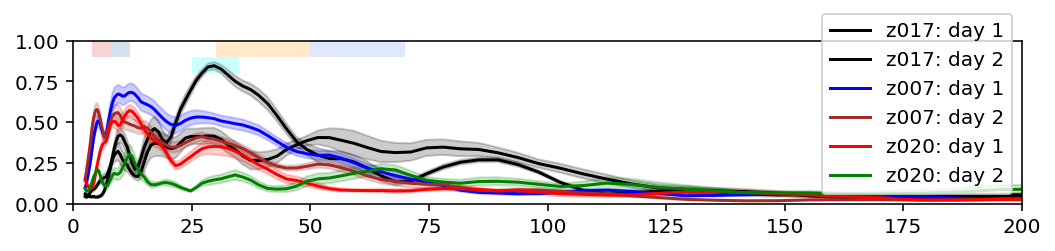

In [116]:
fig1, ax1 = plt.subplots(figsize=(8.5, 1.5))  # For PSDs Summary

cy_num = 1

plot_z_itc(freqs=freqz, itc_z=z017_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='black', label = 'z017: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z017_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='black', label = 'z017: day 2', ax=ax1)

plot_z_itc(freqs=freqz, itc_z=z007_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='blue', label = 'z007: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z007_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='brown', label = 'z007: day 2', ax=ax1)

plot_z_itc(freqs=freqz, itc_z=z020_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='red', label = 'z020: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z020_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='green', label = 'z020: day 2', ax=ax1)
ax1.set_xlim(0,200)
ax1.set_ylim(0,1)
ax1.legend()

for color, start, end in zip(freq_colors, fc_lo_used, fc_hi_used):
    if start == 25:
        ax1.axvspan(xmin=start, xmax=end, ymin=0.8,ymax=0.9, facecolor=color, alpha=.2)
    else:
        ax1.axvspan(xmin=start, xmax=end, ymin=0.9,ymax=1, facecolor=color, alpha=.2)
        
#     ax1.axvline(x=start, linestyle='--', color=color, linewidth=line_width*2)
#     ax1.axvline(x=start*1000, linestyle='--', color=color, linewidth=line_width*2)
# b

In [137]:
# from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
# import matplotlib.font_manager as fm
# fontprops = fm.FontProperties(size=18)

# from src.utils.paths import FIGURES_DIR


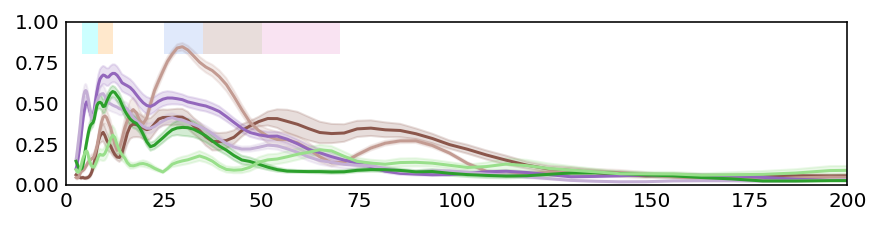

In [158]:
ticksize = 10

fig, ax1 = plt.subplots(figsize=(7, 1.5))  # For PSDs Summary

cy_num = 1

plot_z_itc(freqs=freqz, itc_z=z017_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='#8B564B', label = 'z017: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z017_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='#C39B92', label = 'z017: day 2', ax=ax1)

plot_z_itc(freqs=freqz, itc_z=z007_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='#9367BC', label = 'z007: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z007_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='#C4AFD5', label = 'z007: day 2', ax=ax1)

plot_z_itc(freqs=freqz, itc_z=z020_data_z[0], freq_tree=all_freq_tree, num_cycles = cy_num, color='#2CA02C', label = 'z020: day 1', ax=ax1)
plot_z_itc(freqs=freqz, itc_z=z020_data_z[1], freq_tree=all_freq_tree, num_cycles = cy_num, color='#99DF8B', label = 'z020: day 2', ax=ax1)
ax1.set_xlim(0,200)
ax1.set_ylim(0,1)
# ax1.legend()

for color, start, end in zip(freq_colors, fc_lo_used, fc_hi_used):
    ax1.axvspan(xmin=start, xmax=end, ymin=0.8,ymax=1, facecolor=color, alpha=.2)
        
#     ax1.axvline(x=start, linestyle='--', color=color, linewidth=line_width*2)
#     ax1.axvline(x=start*1000, linestyle='--', color=color, linewidth=line_width*2)
ax1.tick_params(axis='both', which='major', length=0, labelsize=ticksize)

# figure_name = 'ITC_Z_Summary_' + '_final.png'
# figure_type_folder = FIGURES_DIR / 'ITC_Summary'

# # Check if Folder Path Exists
# if not figure_type_folder.exists():
#     figure_type_folder.mkdir(parents=True, exist_ok=True)

# figure_location = figure_type_folder / figure_name

# # fig.savefig(figure_location, format='svg')
# fig.savefig(figure_location, dpi=300, papertype=None, format='png')


----